# LTS Curve Fit

In [ ]:
import numpy as np 
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

In [215]:
data = np.genfromtxt('C:/Users/zumst/git/LTS/LTS_SaschaZumstein_Test/LTS_CurveData.csv', delimiter=';', skip_header=1)
z_mess = data[:,0] # distance
cog_mess = data[:,1] # center of Gravit

In [216]:
def objective_function(x, cog, z):
    a, b, c, d, e, f, g, h, i, j ,k = x
    z_est = (a*cog**10+b*cog**9+c*cog**8+d*cog**7+e*cog**6+f*cog**5+g*cog**4+h*cog**3+i*cog**2+j*cog+k)
    return z_est - z

In [217]:
x0 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
result = least_squares(objective_function, x0, args=(cog_mess, z_mess))
print(result.x)

[ 8.87605837e-26 -3.82858002e-22  6.83842202e-19 -6.43172397e-16
  3.30697798e-13 -8.01128756e-11 -6.84663153e-10  5.21351710e-06
 -9.14387821e-04  2.98917936e-01  2.51240144e+02]


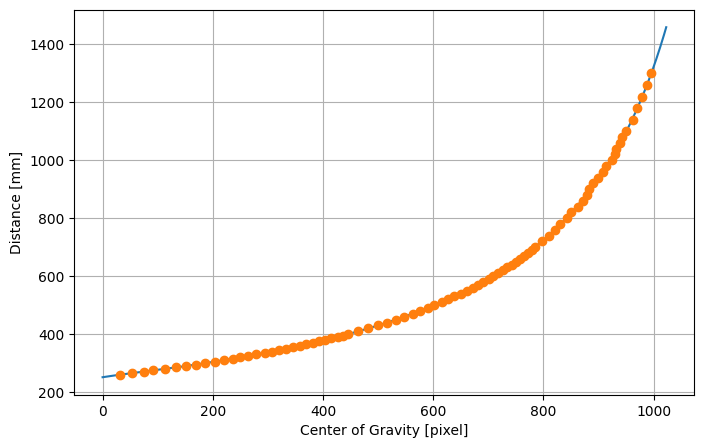

In [218]:
cog_calc = np.linspace(0, 1023, 1024)
z_calc = objective_function(result.x, cog_calc, 0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(cog_calc, z_calc)
ax.plot(cog_mess, z_mess, 'o')
ax.set_xlabel('Center of Gravity [pixel]')
ax.set_ylabel('Distance [mm]')
ax.grid()

820.0
-1.2288014386992927


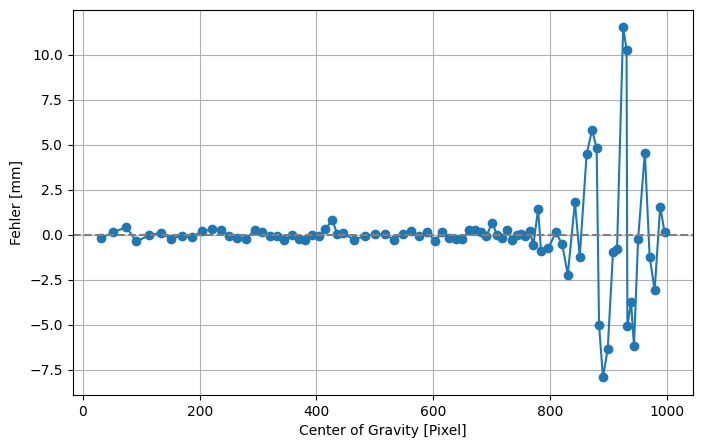

In [219]:
residuals = objective_function(result.x, cog_mess, 0) - np.array(z_mess)

# Plot
fig, ax = plt.subplots()
ax.plot(cog_mess, residuals, 'o-')
ax.axhline(0, color='gray', linestyle='--')
ax.set_xlabel('Center of Gravity [Pixel]')
ax.set_ylabel('Fehler [mm]')
ax.grid()
print(z_mess[64])
print(residuals[64])